## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import os
import xml.etree.ElementTree as Xet
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory Data Analysis

In [2]:
#Load Data
df = pd.read_csv('train.csv')
df.head(5)

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
0,0,37.762150,-122.405660,False,0.044,False,False,False,False,False,False,False,True,R,2,2016-03-25 15:13:02
1,1,37.719157,-122.448254,False,0.000,False,False,False,False,False,False,False,False,R,2,2020-05-05 19:23:00
2,2,37.808498,-122.366852,False,0.000,False,False,False,False,False,False,True,False,R,3,2016-09-16 19:57:16
3,3,37.785930,-122.391080,False,0.009,False,False,True,False,False,False,False,False,R,1,2020-03-29 19:48:43
4,4,37.719141,-122.448457,False,0.000,False,False,False,False,False,False,False,False,R,2,2019-10-09 08:47:00


In [3]:
# check the existance of nulls 
print(" Number of null records in each column" , df.isnull().sum() ) 
# check the existance of duplicated rows or not 
print("Number of Duplicated records",df.duplicated().sum() ) 

 Number of null records in each column ID              0
Lat             0
Lng             0
Bump            0
Distance(mi)    0
Crossing        0
Give_Way        0
Junction        0
No_Exit         0
Railway         0
Roundabout      0
Stop            0
Amenity         0
Side            0
Severity        0
timestamp       0
dtype: int64
Number of Duplicated records 0


In [4]:
#get information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6407 entries, 0 to 6406
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6407 non-null   int64  
 1   Lat           6407 non-null   float64
 2   Lng           6407 non-null   float64
 3   Bump          6407 non-null   bool   
 4   Distance(mi)  6407 non-null   float64
 5   Crossing      6407 non-null   bool   
 6   Give_Way      6407 non-null   bool   
 7   Junction      6407 non-null   bool   
 8   No_Exit       6407 non-null   bool   
 9   Railway       6407 non-null   bool   
 10  Roundabout    6407 non-null   bool   
 11  Stop          6407 non-null   bool   
 12  Amenity       6407 non-null   bool   
 13  Side          6407 non-null   object 
 14  Severity      6407 non-null   int64  
 15  timestamp     6407 non-null   object 
dtypes: bool(9), float64(3), int64(2), object(2)
memory usage: 406.8+ KB


### Data Cleaning

In [5]:
# conversion to timestamp
df.timestamp = pd.to_datetime(df.timestamp, utc = True)

# True & false conversion to 1 and 0 
columns = ['Crossing' , 'Junction' , 'Railway' , 'Roundabout' , 'Amenity','Bump', 'Give_Way','No_Exit','Roundabout','Stop']
df[columns] = df[columns].astype(int)

#Convert Right side to 0 and Left side to 1
df['Side'] = df['Side'].replace(['R','L'],[0,1])

#lat and lng transformation
df['x']=np.cos(df['Lat']) * np.cos(df['Lng'])
df['y']=np.cos(df['Lat']) * np.sin(df['Lng'])
df['z']=np.sin(df['Lat'])
df['loc']=df['x']*df['y']*df['z']


# checking the conversion
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6407 entries, 0 to 6406
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   ID            6407 non-null   int64              
 1   Lat           6407 non-null   float64            
 2   Lng           6407 non-null   float64            
 3   Bump          6407 non-null   int32              
 4   Distance(mi)  6407 non-null   float64            
 5   Crossing      6407 non-null   int32              
 6   Give_Way      6407 non-null   int32              
 7   Junction      6407 non-null   int32              
 8   No_Exit       6407 non-null   int32              
 9   Railway       6407 non-null   int32              
 10  Roundabout    6407 non-null   int32              
 11  Stop          6407 non-null   int32              
 12  Amenity       6407 non-null   int32              
 13  Side          6407 non-null   int64              
 14  Severity

In [6]:
df.describe()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,x,y,z,loc
count,6407.000000,6407.000000,6407.000000,6407.0,6407.000000,6407.00000,6407.000000,6407.000000,6407.000000,6407.000000,6407.0,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000
mean,3203.000000,37.765653,-122.405990,0.0,0.135189,0.08241,0.000468,0.246449,0.000156,0.026533,0.0,0.097706,0.037147,0.050726,2.293429,-0.990149,-0.115478,0.066459,0.007919
std,1849.685919,0.032555,0.028275,0.0,0.396360,0.27501,0.021635,0.430977,0.012493,0.160728,0.0,0.296939,0.189136,0.219454,0.521225,0.004465,0.027893,0.032478,0.004959
min,0.000000,37.609619,-122.510440,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,-0.999199,-0.170299,-0.089373,-0.011531
25%,1601.500000,37.737096,-122.412210,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,-0.992632,-0.128825,0.037976,0.004252
50%,3203.000000,37.768238,-122.404835,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,-0.991270,-0.116754,0.069071,0.007250
75%,4804.500000,37.787813,-122.392478,0.0,0.041000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.000000,-0.988172,-0.109619,0.088585,0.010739
max,6406.000000,37.825626,-122.349734,0.0,6.820000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,4.000000,-0.978129,-0.011649,0.126177,0.019893


In [7]:
# spliiting the Timestamp column 

df['Year'] = df.timestamp.dt.year
df['Month'] = df.timestamp.dt.month
df['Day'] = df.timestamp.dt.day
df['Hour'] = df.timestamp.dt.hour
df['weekday'] = df.timestamp.dt.weekday

# checking the splitiing step
df.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,...,timestamp,x,y,z,loc,Year,Month,Day,Hour,weekday
0,0,37.762150,-122.405660,0,0.044,0,0,0,0,0,...,2016-03-25 15:13:02+00:00,-0.991254,-0.115960,0.062996,0.007241,2016,3,25,15,4
1,1,37.719157,-122.448254,0,0.000,0,0,0,0,0,...,2020-05-05 19:23:00+00:00,-0.997073,-0.073778,0.020044,0.001474,2020,5,5,19,1
2,2,37.808498,-122.366852,0,0.000,0,0,0,0,0,...,2016-09-16 19:57:16+00:00,-0.982066,-0.153714,0.109168,0.016480,2016,9,16,19,4
3,3,37.785930,-122.391080,0,0.009,0,0,1,0,0,...,2020-03-29 19:48:43+00:00,-0.987693,-0.130167,0.086709,0.011148,2020,3,29,19,6
4,4,37.719141,-122.448457,0,0.000,0,0,0,0,0,...,2019-10-09 08:47:00+00:00,-0.997089,-0.073575,0.020028,0.001469,2019,10,9,8,2


In [8]:
#Load Holiday Data from xml file

cols = ["date", "holiday"]
rows = []
xmlparse = Xet.parse('holidays.xml')
root = xmlparse.getroot()
for i in root:
    date = i.find("date").text
    description = i.find("description").text
    
    rows.append({"date": date,
                 "holiday": description})

holiday_dF = pd.DataFrame(rows, columns=cols)
print(holiday_dF.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     90 non-null     object
 1   holiday  90 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB
None


In [9]:
# conversion of date from object format to datetime
holiday_dF['timestamp'] = pd.to_datetime(holiday_dF.date,utc = True)
holiday_dF['timestamp'] = holiday_dF.timestamp.dt.date
df['timestamp'] = df.timestamp.dt.date
holiday_dF.drop(["date"], axis=1, inplace=True)


In [10]:
# merging the holiday conditon to data

holidayMergedDF = pd.merge(df,holiday_dF,how = 'left' ,on = ['timestamp'])

#holiday column 0 represent regular day 1 represent holiday
holidayMergedDF['holiday'] = holidayMergedDF['holiday'] * 0
holidayMergedDF['holiday'] = holidayMergedDF['holiday'].replace([np.NaN,''],[0,1])
print(holidayMergedDF.shape)
holidayMergedDF.isnull().sum()

(6407, 26)


ID              0
Lat             0
Lng             0
Bump            0
Distance(mi)    0
Crossing        0
Give_Way        0
Junction        0
No_Exit         0
Railway         0
Roundabout      0
Stop            0
Amenity         0
Side            0
Severity        0
timestamp       0
x               0
y               0
z               0
loc             0
Year            0
Month           0
Day             0
Hour            0
weekday         0
holiday         0
dtype: int64

In [11]:
# loading weather Condition data
weather_dF = pd.read_csv('weather-sfcsv.csv')
weather_dF.head()

,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,2020,27,7,18,Fair,64.0,0.0,64.0,70.0,20.0,10.0,No
1,2017,30,9,17,Partly Cloudy,NaN,NaN,71.1,57.0,9.2,10.0,No
2,2017,27,6,5,Overcast,NaN,NaN,57.9,87.0,15.0,9.0,No
3,2016,7,9,9,Clear,NaN,NaN,66.9,73.0,4.6,10.0,No
4,2019,19,10,2,Fair,52.0,0.0,52.0,89.0,0.0,9.0,No


In [12]:
# check the existance of nulls 
print(" Number of null records in each column" , weather_dF.isnull().sum() ) 
# check the existance of duplicated rows or not 
print("Number of Duplicated records",weather_dF.duplicated().sum() ) 
print(weather_dF.info())

 Number of null records in each column Year                    0
Day                     0
Month                   0
Hour                    0
Weather_Condition       1
Wind_Chill(F)        3609
Precipitation(in)    3327
Temperature(F)          2
Humidity(%)             2
Wind_Speed(mph)       345
Visibility(mi)          1
Selected                0
dtype: int64
Number of Duplicated records 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6901 non-null   int64  
 1   Day                6901 non-null   int64  
 2   Month              6901 non-null   int64  
 3   Hour               6901 non-null   int64  
 4   Weather_Condition  6900 non-null   object 
 5   Wind_Chill(F)      3292 non-null   float64
 6   Precipitation(in)  3574 non-null   float64
 7   Temperature(F)     6899 non-null   float64
 8   Humidity(%)  

In [13]:
# cleaning weather condition Data
#convert Weather_Condition to categorical 
#weather_dF['Weather_Condition'] = weather_dF['Weather_Condition'].astype('category').cat.codes

#fill null values with median
weather_dF['Wind_Speed(mph)'].fillna((weather_dF['Wind_Speed(mph)'].median()), inplace=True)
weather_dF['Humidity(%)'].fillna((weather_dF['Humidity(%)'].median()), inplace=True)
weather_dF['Temperature(F)'].fillna((weather_dF['Temperature(F)'].median()), inplace=True)
weather_dF['Visibility(mi)'].fillna((weather_dF['Visibility(mi)'].median()), inplace=True)
weather_dF['Wind_Chill(F)'].fillna((weather_dF['Wind_Chill(F)'].median()), inplace=True)

#drop nulls of weather condition
weather_dF.dropna(subset=['Weather_Condition'],inplace = True)

weather_dF.describe()


,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi)
count,6900.000000,6900.000000,6900.000000,6900.000000,6900.000000,3574.000000,6900.000000,6900.000000,6900.000000,6900.000000
mean,2018.293188,15.625217,6.775072,12.791449,59.363797,0.006444,59.905333,68.571159,10.772623,9.441851
std,1.390538,8.704327,3.568210,5.873144,6.461032,0.028822,7.977289,16.178962,6.247123,1.640513
min,2016.000000,1.000000,1.000000,0.000000,31.100000,0.000000,36.000000,10.000000,0.000000,0.000000
25%,2017.000000,8.000000,4.000000,8.000000,59.000000,0.000000,54.000000,59.000000,6.000000,10.000000
50%,2019.000000,15.000000,7.000000,14.000000,59.000000,0.000000,59.000000,70.000000,10.000000,10.000000
75%,2020.000000,23.000000,10.000000,17.000000,59.000000,0.000000,64.900000,80.000000,15.000000,10.000000
max,2020.000000,31.000000,12.000000,23.000000,98.000000,0.490000,98.100000,100.000000,40.300000,10.000000


In [14]:
#Check out some categorical features.
cat_names = ['Selected', 'Weather_Condition']
print("Unique count of categorical features:")
for col in cat_names:
  print(col,weather_dF[col].unique().size)

Unique count of categorical features:
Selected 2
Weather_Condition 26


In [15]:
#drop unimportant features
weather_dF.drop(["Precipitation(in)","Selected"], axis=1, inplace=True)
# show distinctive weather conditions 
weather_dF['Weather_Condition'].unique()

array(['Fair', 'Partly Cloudy', 'Overcast', 'Clear', 'Mostly Cloudy',
       'Cloudy', 'Smoke', 'Scattered Clouds', 'Heavy Rain', 'Light Rain',
       'Fair / Windy', 'Rain', 'Partly Cloudy / Windy', 'Cloudy / Windy',
       'Mostly Cloudy / Windy', 'Haze', 'Shallow Fog', 'Fog',
       'Rain / Windy', 'Light Rain / Windy', 'Mist', 'Light Drizzle',
       'Patches of Fog', 'Squalls', 'Fog / Windy',
       'Light Thunderstorms and Rain'], dtype=object)

In [16]:
weather_dF['Clear'] = np.where(weather_dF['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
weather_dF['Cloud'] = np.where(weather_dF['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
weather_dF['Rain'] = np.where(weather_dF['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
weather_dF['Heavy_Rain'] = np.where(weather_dF['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
weather_dF['Snow'] = np.where(weather_dF['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
weather_dF['Heavy_Snow'] = np.where(weather_dF['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
weather_dF['Fog'] = np.where(weather_dF['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)
# comversion to 1 and 0 
columns = ['Clear' , 'Cloud' , 'Rain' , 'Heavy_Rain' , 'Snow','Heavy_Snow', 'Fog']
weather_dF[columns] = weather_dF[columns].astype(int)

weather_dF['Weather_Condition'] = weather_dF['Weather_Condition'].astype('category').cat.codes
weather_dF.head()

,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog
0,2020,27,7,18,3,64.0,64.0,70.0,20.0,10.0,0,0,0,0,0,0,0
1,2017,30,9,17,17,59.0,71.1,57.0,9.2,10.0,0,1,0,0,0,0,0
2,2017,27,6,5,16,59.0,57.9,87.0,15.0,9.0,0,1,0,0,0,0,0
3,2016,7,9,9,0,59.0,66.9,73.0,4.6,10.0,1,0,0,0,0,0,0
4,2019,19,10,2,3,52.0,52.0,89.0,0.0,9.0,0,0,0,0,0,0,0


In [17]:
# cleaning of data
print(weather_dF.shape)
uniqueWeatherDF  = weather_dF.drop_duplicates(['Year','Hour', 'Day' ,'Month'],keep = 'last', inplace = False)
print("shape after removing duplicated relative to Hour , Day, Month and Year ",uniqueWeatherDF.shape)

# merging the weather conditon to data
weatherMergedDF = pd.merge(holidayMergedDF,uniqueWeatherDF,how = 'left' ,on = ['Hour' ,'Year', 'Day' ,'Month'])
weatherMergedDF.dropna(inplace = True)
print(weatherMergedDF.shape)


(6900, 17)
shape after removing duplicated relative to Hour , Day, Month and Year  (5971, 17)
(6406, 39)


In [18]:
# removing some nonImportant columns 
df = weatherMergedDF.drop(columns=['timestamp','Bump', 'Give_Way','No_Exit','Roundabout'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6406 entries, 0 to 6406
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 6406 non-null   int64  
 1   Lat                6406 non-null   float64
 2   Lng                6406 non-null   float64
 3   Distance(mi)       6406 non-null   float64
 4   Crossing           6406 non-null   int32  
 5   Junction           6406 non-null   int32  
 6   Railway            6406 non-null   int32  
 7   Stop               6406 non-null   int32  
 8   Amenity            6406 non-null   int32  
 9   Side               6406 non-null   int64  
 10  Severity           6406 non-null   int64  
 11  x                  6406 non-null   float64
 12  y                  6406 non-null   float64
 13  z                  6406 non-null   float64
 14  loc                6406 non-null   float64
 15  Year               6406 non-null   int64  
 16  Month              6406 

### Extract new features

In [19]:
#add new features Rush Hour
df['RushHour'] = ((df['Hour'] > 14) & (df['Hour'] < 18)).astype(int)
#add new features Midnight
df['Midnight'] = ((df['Hour'] > 23) & (df['Hour'] < 6)).astype(int)
#add new features to count number of crashes at certain places
df_count = pd.DataFrame(df.groupby(['Lat','Lng']).ID.count().reset_index())
df_count.columns = (['Lat', 'Lng','CrashCount'])
df = pd.merge(df,df_count,how = 'left' ,on = ['Lat', 'Lng'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6406 entries, 0 to 6405
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 6406 non-null   int64  
 1   Lat                6406 non-null   float64
 2   Lng                6406 non-null   float64
 3   Distance(mi)       6406 non-null   float64
 4   Crossing           6406 non-null   int32  
 5   Junction           6406 non-null   int32  
 6   Railway            6406 non-null   int32  
 7   Stop               6406 non-null   int32  
 8   Amenity            6406 non-null   int32  
 9   Side               6406 non-null   int64  
 10  Severity           6406 non-null   int64  
 11  x                  6406 non-null   float64
 12  y                  6406 non-null   float64
 13  z                  6406 non-null   float64
 14  loc                6406 non-null   float64
 15  Year               6406 non-null   int64  
 16  Month              6406 

In [20]:
#ordered correlated attributes with Severity
#(abs(df.corr()[['Severity']])).sort_values(by='Severity',ascending=False)

## Data Splitting

In [31]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42) # Try adding `stratify` here

X_train = train_df.drop(columns=['ID', 'Severity'])
y_train = train_df['Severity']

X_val = val_df.drop(columns=['ID', 'Severity'])
y_val = val_df['Severity']

In [22]:
# This cell is used to select the numerical features. IT SHOULD BE REMOVED AS YOU DO YOUR WORK.

#X_train = X_train[['Lat', 'Lng','Distance(mi)','Crossing','Month','Year','Day','Stop','Side','Temperature(F)', 'Humidity(%)','Wind_Speed(mph)','Weather_Condition','holiday','RushHour']]
#X_val = X_val[['Lat', 'Lng','Distance(mi)','Crossing','Month','Year','Day','Stop','Side','Temperature(F)', 'Humidity(%)','Wind_Speed(mph)','Weather_Condition','holiday','RushHour']]

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_val)

# Train the classifier/
classifier = classifier.fit(X_train, y_train)
print("The accuracy of the classifier on the validation set is ", (classifier.score(X_val, y_val)))

importances = classifier.feature_importances_
# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

The accuracy of the classifier on the validation set is  0.7457098283931357


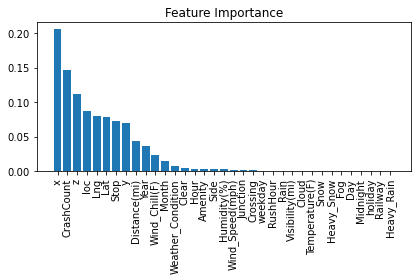

In [33]:
#Visualize the feature importance
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


In [34]:
X_train.columns[sorted_indices]

Index(['x', 'CrashCount', 'z', 'loc', 'Lng', 'Lat', 'Stop', 'y',
       'Distance(mi)', 'Year', 'Wind_Chill(F)', 'Month', 'Weather_Condition',
       'Clear', 'Hour', 'Amenity', 'Side', 'Humidity(%)', 'Wind_Speed(mph)',
       'Junction', 'Crossing', 'weekday', 'RushHour', 'Rain', 'Visibility(mi)',
       'Cloud', 'Temperature(F)', 'Snow', 'Heavy_Snow', 'Fog', 'Day',
       'Midnight', 'holiday', 'Railway', 'Heavy_Rain'],
      dtype='object')

In [42]:
X_train = train_df.drop(columns=['ID', 'Severity'])
y_train = train_df['Severity']

X_val = val_df.drop(columns=['ID', 'Severity'])
y_val = val_df['Severity']
X_train = X_train[['x', 'CrashCount', 'z', 'loc', 'Lng', 'Lat', 'Stop', 'y',
       'Distance(mi)', 'Year', 'Wind_Chill(F)', 'Month']]
X_val = X_val[['x', 'CrashCount', 'z', 'loc', 'Lng', 'Lat', 'Stop', 'y',
       'Distance(mi)', 'Year', 'Wind_Chill(F)', 'Month']]

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_val)

# Create an instance of the classifier
classifier2 = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier/
classifier2 = classifier2.fit(X_train_std, y_train)
print("The accuracy of the classifier on the validation set is ", (classifier2.score(X_test_std, y_val)))

The accuracy of the classifier on the validation set is  0.751170046801872
